<a href="https://colab.research.google.com/github/kiranmahara9600/Global-Terrorism-Analysis/blob/main/EDA_on_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###**Project : Exploratory data Analysis - Terrorism**


###**Objective :**

* Perform Exploratory Data Analysis on dataset **Global Terrorism**
* To find out the hot zone of terrorism and insights by exploring the data

#**Exploratory Data Analysis**

In [1]:
#importing all the necessary modules required during the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
#to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading globalterrorism csv data and storing it in global_terrorism_df dataframe
file_path= '/content/drive/MyDrive/Datascience/Datasets/globalterrorismdb_0718dist.csv'
global_terrorism_df=pd.read_csv(file_path, encoding = "ISO-8859-1")

#**Part 1: Data Preprocessing and cleaning**

In [4]:
#------------------------------------Block-1-------------------------------------

#checking the no. of observations and features in the dataset
global_terrorism_df.shape

(181691, 135)

So, the data has 181691 observations with 135 different features

In [5]:
#------------------------------------Block-2-------------------------------------

#visualising 1st five observations of global_terrorism_df
pd.set_option('max_columns', None)    #to show all the columns of the dataframe
global_terrorism_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
#------------------------------------Block-3-------------------------------------

#checking for different columns of the global_terrorism_df dataframe
print(global_terrorism_df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [7]:
#------------------------------------Block-4-------------------------------------

#checking for duplicate observations in global_terrorism_df
global_terrorism_df.duplicated().sum()

0

*No any duplicate observations in the data*

In [8]:
#------------------------------------Block-5-------------------------------------

#checking for basic info of dataset
global_terrorism_df.info(verbose=True, buf=None, max_cols=None, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

*There are many columns in the dataset which have null values, so we will either drop the columns or will apply some imputation techniques to remove null values*

*We have some features in dataset which conveys same meaning e.g **natlty1** shows unique code for nations and **natlty1_txt** contains name of different nations, so both conveys same meaning. Let's drop all these features which conveys same meaning*

In [9]:
#------------------------------------Block-6-------------------------------------

#deleting features which have meaning somewhere similar to any other feature
global_terrorism_df.drop(columns=['natlty1','attacktype1','targtype1','targsubtype1','weaptype1','weapsubtype1','country','region',
                                  'targsubtype1_txt','corp1'],inplace=True)

In [10]:
#------------------------------------Block-7-------------------------------------

#renaming some of column names
global_terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country', 'provstate':'State','region_txt':'Region',
                                   'attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed','nwound':'Wounded', 'gname':'Terrorist group',
                                    'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','latitude':'Latitude', 'longitude':'Longitude',
                                    'weapsubtype1_txt':'Weapon_subtype', 'natlty1_txt':'Nationality'},inplace=True)
                                   

In [11]:
#------------------------------------Block-8-------------------------------------

#checking for the percentage of null values in each column
pd.set_option('max_rows', None) 
null_data  =global_terrorism_df.isnull().sum()/len(global_terrorism_df)*100
null_data

eventid                0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
Country                0.000000
Region                 0.000000
State                  0.231712
city                   0.238867
Latitude               2.507554
Longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
Attack_Type            0.000000
attacktype2           96.524869
attacktype2_txt       96.524869
attacktype3           99.764435
attacktype3_txt       99.764435
Target_t

*Okay so we have columns having as high as 99% null values. We'll straight away delete all the columns that have more than 30 percent of null values*

In [12]:
#------------------------------------Block-9-------------------------------------

#checking for no.of columns having more than 30% null values
len(null_data[null_data>30])

87

In [13]:
#------------------------------------Block-10-------------------------------------

#deleting those columns which have more than 30% null_values
global_terrorism_df.drop(columns=null_data[null_data>30].index,inplace=True)

In [14]:
#------------------------------------Block-11-------------------------------------

#checking for columns that needs processing for null values
null_data[(null_data<30) & (null_data>0)]

State              0.231712
city               0.238867
Latitude           2.507554
Longitude          2.508104
specificity        0.003302
doubtterr          0.000550
multiple           0.000550
Target             0.350045
Nationality        0.858050
guncertain1        0.209146
Weapon_subtype    11.430396
Killed             5.676120
Wounded            8.977330
ishostkid          0.097969
dtype: float64

In [15]:
#------------------------------------Block-12-------------------------------------

#storing columns which have null values between 0 and 30% in a list 
null_btwn_0n30=list(null_data[(null_data<30) & (null_data>0)].index)
null_btwn_0n30

['State',
 'city',
 'Latitude',
 'Longitude',
 'specificity',
 'doubtterr',
 'multiple',
 'Target',
 'Nationality',
 'guncertain1',
 'Weapon_subtype',
 'Killed',
 'Wounded',
 'ishostkid']

*Lets visualise the distribution for each variable having null values to look for best imputation* 

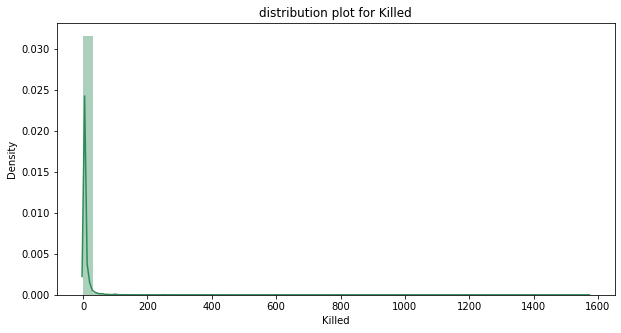

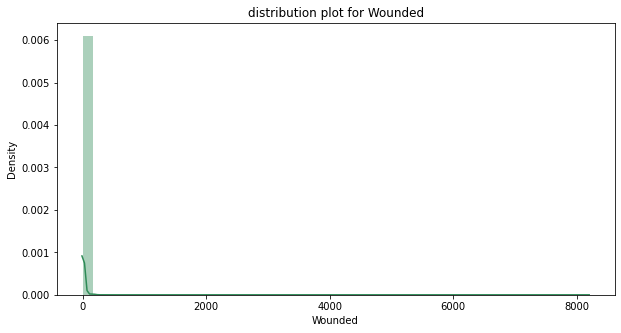

In [16]:
#------------------------------------Block-13-------------------------------------

#looking for distribution of 'Killed' and 'Wounded'
for col in ['Killed','Wounded']:
   fig = plt.figure(figsize=(10,5))   #defining figure
   axs = fig.gca()   #to get current axes
   sns.distplot(global_terrorism_df[col],ax=axs,color='seagreen')   #distribution plot
   plt.title(f'distribution plot for {col}')   

*As we can see, these both columns have most of the observation value as 0, and a few observations with values more than 0. So, its better to replace null values for these both columns with mode of these particular columns*

In [17]:
#------------------------------------Block-14-------------------------------------

#replacing null values with mode values of these columns
for col in ['Killed','Wounded']:
  global_terrorism_df[col].fillna(global_terrorism_df[col].mode()[0],inplace=True)

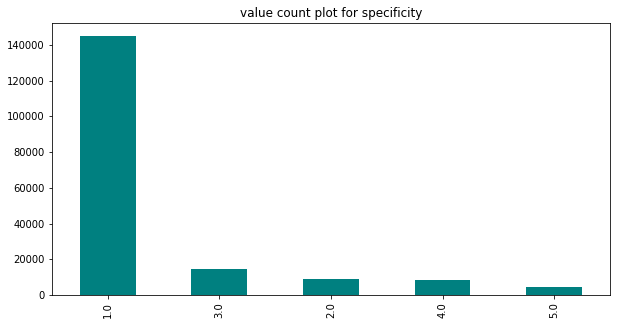

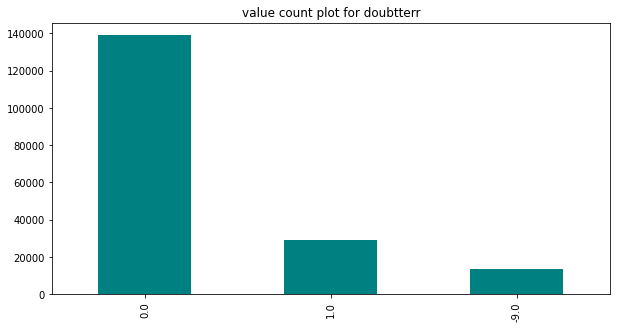

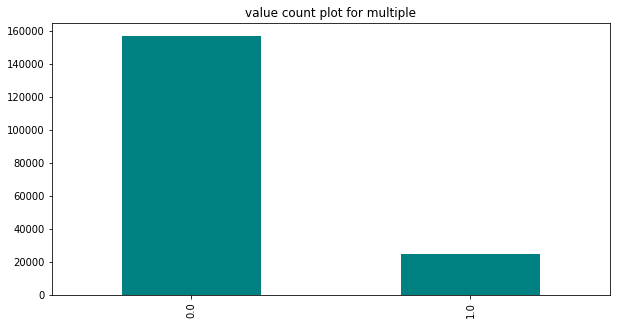

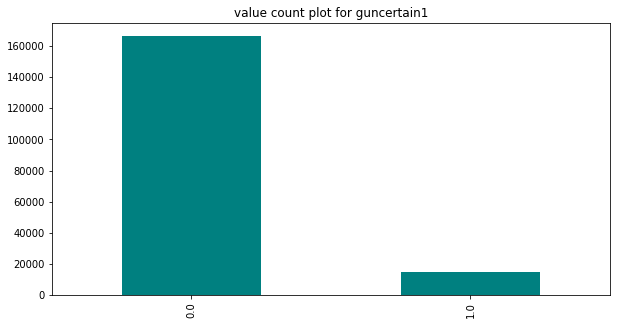

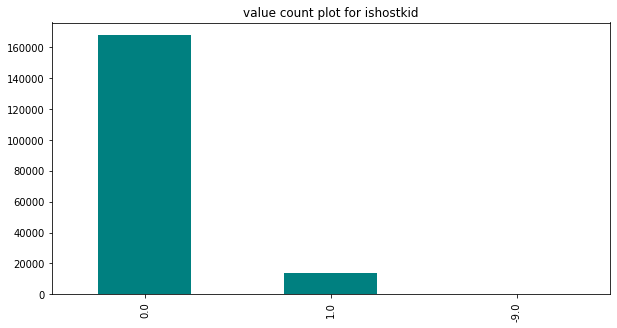

In [18]:
#------------------------------------Block-15-------------------------------------

#looking for different values of ['specificity','doubtterr','multiple','guncertain1','ishostkid']
for col in ['specificity','doubtterr','multiple','guncertain1','ishostkid']:
   fig = plt.figure(figsize=(10,5))
   axs = fig.gca()
   global_terrorism_df[col].value_counts().plot.bar(ax=axs,color='teal')   #bar plot
   plt.title(f'value count plot for {col}')   #to give title

*By looking at above graphs, we could not find any method better than mode to replace null values*

In [19]:
#------------------------------------Block-16-------------------------------------

#replacing null values with mode of columns
for col in ['specificity','doubtterr','multiple','guncertain1','ishostkid']:
   global_terrorism_df[col].fillna(global_terrorism_df[col].mode()[0],inplace=True)

In [20]:
#------------------------------------Block-17-------------------------------------

#replacing null values with 'unkown' for remaining columns
for col in ['State','city','Target_type','Target','Weapon_subtype','Nationality']:
   global_terrorism_df[col].fillna("Unknown",inplace=True)

*For Latitude and Longitude features, we can neither replace null values with 0 nor with unknown or mode. So, While analysing these two features,we will use only those observations which have non null values for Latitude and Logitude*

In [21]:
#------------------------------------Block-18-------------------------------------

#checking for null values 
global_terrorism_df.isnull().sum()

eventid               0
Year                  0
Month                 0
Day                   0
extended              0
Country               0
Region                0
State                 0
city                  0
Latitude           4556
Longitude          4557
specificity           0
vicinity              0
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
multiple              0
success               0
suicide               0
Attack_Type           0
Target_type           0
Target                0
Nationality           0
Terrorist group       0
guncertain1           0
individual            0
Weapon_type           0
Weapon_subtype        0
Killed                0
Wounded               0
property              0
ishostkid             0
dbsource              0
INT_LOG               0
INT_IDEO              0
INT_MISC              0
INT_ANY               0
dtype: int64

*okay, we are done with null value treatment*

*Now, we are are creating a new dataframe which will have some specific features which we will use for analysis*

In [22]:
#------------------------------------Block-19-------------------------------------

##creating a new dataframe with some selected features for further analysis
#creating a copy of global_terrorism_df and dropping some features which we will not use for analysis to create a new dataframe updated_global_terrorism_df
updated_global_terrorism_df=global_terrorism_df.copy().drop(columns=['specificity','vicinity','crit1','crit2','crit3',  'doubtterr','multiple',     
                                                              'guncertain1','individual','property','ishostkid','dbsource','INT_LOG','INT_IDEO',
                                                              'INT_MISC','INT_ANY'])

In [23]:
#------------------------------------Block-20-------------------------------------

updated_global_terrorism_df.shape   #shape of updated_global_terrorism_df

(181691, 22)

In [24]:
#------------------------------------Block-21-------------------------------------

updated_global_terrorism_df.head(5)   #checking for first 5 observations in updated_global_terrorism_df

,eventid,Year,Month,Day,extended,Country,Region,State,city,Latitude,Longitude,success,suicide,Attack_Type,Target_type,Target,Nationality,Terrorist group,Weapon_type,Weapon_subtype,Killed,Wounded
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,Unknown,1.0,0.0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,Unknown,0.0,0.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Employee,United States,Unknown,Unknown,Unknown,1.0,0.0
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,Explosives,Unknown Explosive Type,0.0,0.0
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,Incendiary,Unknown,0.0,0.0


##**Data Dictionary**

* *eventid - unique identifier for each observation*

* *Year - year in which incident occurred*

* *Month - month on which incident occurred*

* *Day - day of the month on which incident occurred*

* *extended - duration of incident extended more than 24 hours or not*
           
  *1='yes' and 0='no'*

* *Country - country where incident occurred*

* *Region - region/continent in which incident occurred*

* *State - state in which incident occurred*

* *city - city in which incident occurred*

* *Latitude and Longitude - geographical location of the place where incident occurred*

* *success - success of terrorist strike*

  *1='successfull' and 0='unsuccessfull'*

* *suicide - the incident was suicide attack or not*

  *1='yes' and 0='no'*

* *Attack_Type - general method of attack and broad class of tactics used*

* *Target_type - general type of target/victim*

* *Target - the specific person, building installation that was targeted or victimised*

* *Nationality - nationality of the target that was attacked*

* *Terrorist group - name of the group that carried out the attack*

* *Weapon_type - general type of weapon used in the incident*

* *weapon_subtype - more specific value for the weapon type*

* *Killed - total no. of confirmed fatalities for the incident*

* *Wounded - total no. of injured people*







#**Part 2: Feature analysis**

##**Year wise attack analysis**

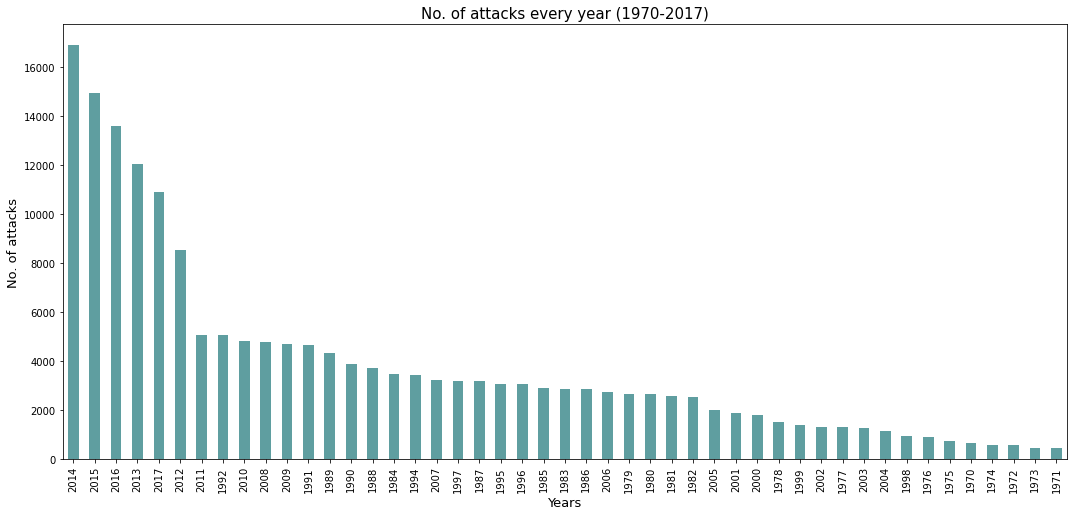

In [25]:
#------------------------------------Block-22-------------------------------------

#visualising no. of attacks yearly
plt.rcParams['figure.figsize']=(18,8)   #defining figure
updated_global_terrorism_df['Year'].value_counts().plot.bar(color='cadetblue')   #bar plot for no. of attacks each year
plt.title('No. of attacks every year (1970-2017)',fontsize=15)   #title for the plot
plt.xlabel('Years',fontsize=13)  #x-axis label for the plot
plt.ylabel('No. of attacks',fontsize=13)   #y-axis label for the plot
plt.show()

*From the above graph, we can observe that :*

*Number of attacks in decade from 1970 to 2014 has been increased  but from 2014 to 2017 there is gradual decreament in the same*

*Number of attacks in the year between 1970 to 1976 was under 1000*

*Number of attacks after 2011 has been drastically increased from 5000 to around 17000*

*Maximum no. of attacks were there in 2014 followed by 2015*

###**Number of successfull and failure attacks (1970 to 2017)**

In [26]:
#------------------------------------Block-23-------------------------------------

#creating a dataframe which contains no. of successfull and unsuccessfull attacks yearwise
yearwise_successnfailure_data=updated_global_terrorism_df.groupby(['Year','success']).agg({'eventid':'count'}).reset_index()
yearwise_successnfailure_data.rename(columns={'eventid':'no. of attacks'},inplace=True)    #renaming the column
#subdataframe from yearwise_successnfailure_data where success=1
success_inattacks_over_years=yearwise_successnfailure_data[yearwise_successnfailure_data['success']==1]   
#subdataframe from yearwise_successnfailure_data where success=0 
failure_inattacks_over_years=yearwise_successnfailure_data[yearwise_successnfailure_data['success']==0]  
#calculating total no. of successfull attacks each year 
successfull_attacks=success_inattacks_over_years.groupby('Year').agg({'no. of attacks':'sum'})   
successfull_attacks.rename(columns={'no. of attacks':'no. of successfull attacks'},inplace=True)
#calculating total no. of unsuccessfull attacks each year
unsuccessfull_attacks=failure_inattacks_over_years.groupby('Year').agg({'no. of attacks':'sum'}) 
unsuccessfull_attacks.rename(columns={'no. of attacks':'no. of unsuccessfull attacks'},inplace=True)
#merging two dataframes
successnfail_yearwise_df=pd.merge(successfull_attacks,unsuccessfull_attacks,how='inner',on='Year')   
successnfail_yearwise_df

,no. of successfull attacks,no. of unsuccessfull attacks
Year,,
1970,549,102
1971,420,51
1972,452,116
1973,433,40
1974,545,36
1975,705,35
1976,861,62
1977,1191,128
1978,1411,115


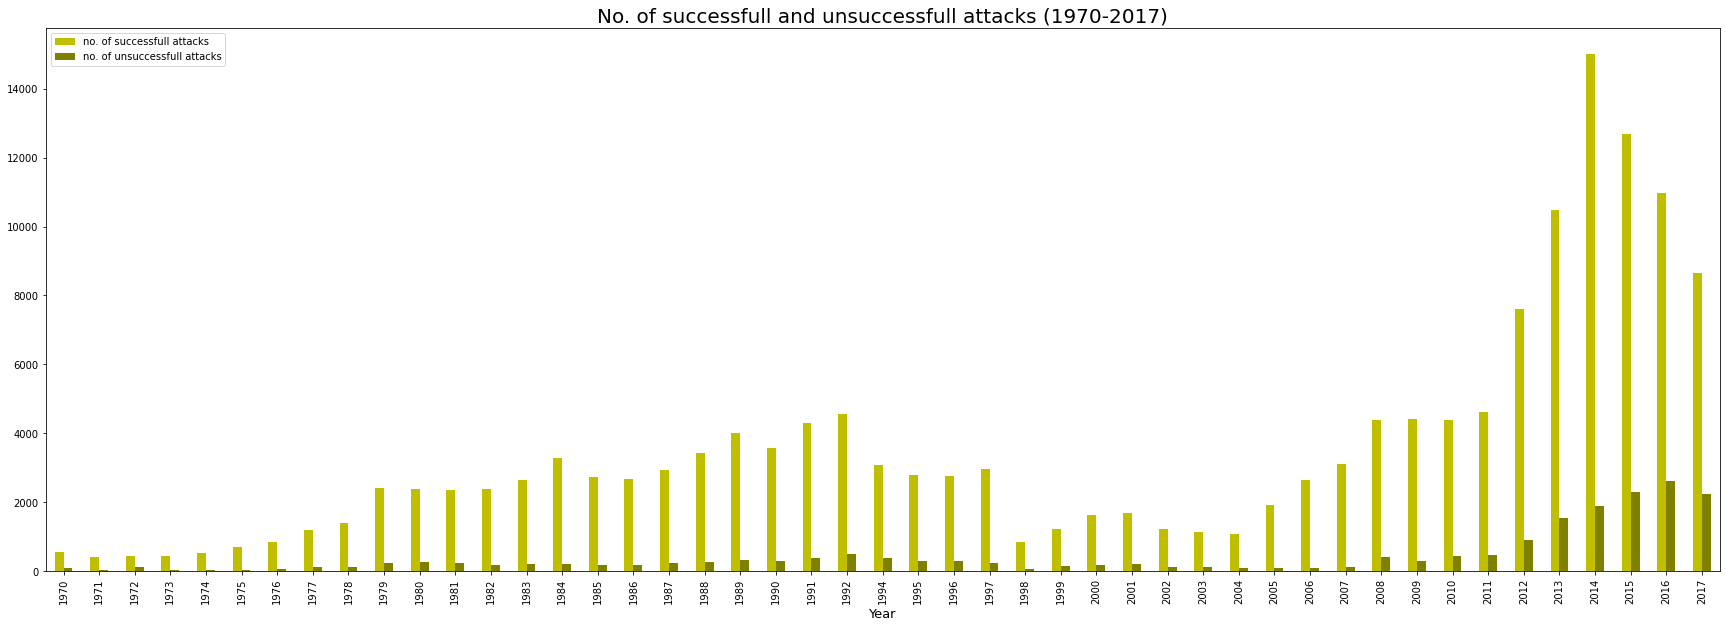

In [27]:
#------------------------------------Block-24-------------------------------------

#visualising Block-23
plt.rcParams['figure.figsize']=(30,10)   #defining figure
successnfail_yearwise_df.plot.bar(color=['y','olive'])   #bar plot representing no. of successful and unsuccessful attacks yearwise
plt.title('No. of successfull and unsuccessfull attacks (1970-2017)',fontsize=20)  
plt.xlabel('Year',fontsize=13)   #to give x axis label
plt.show()

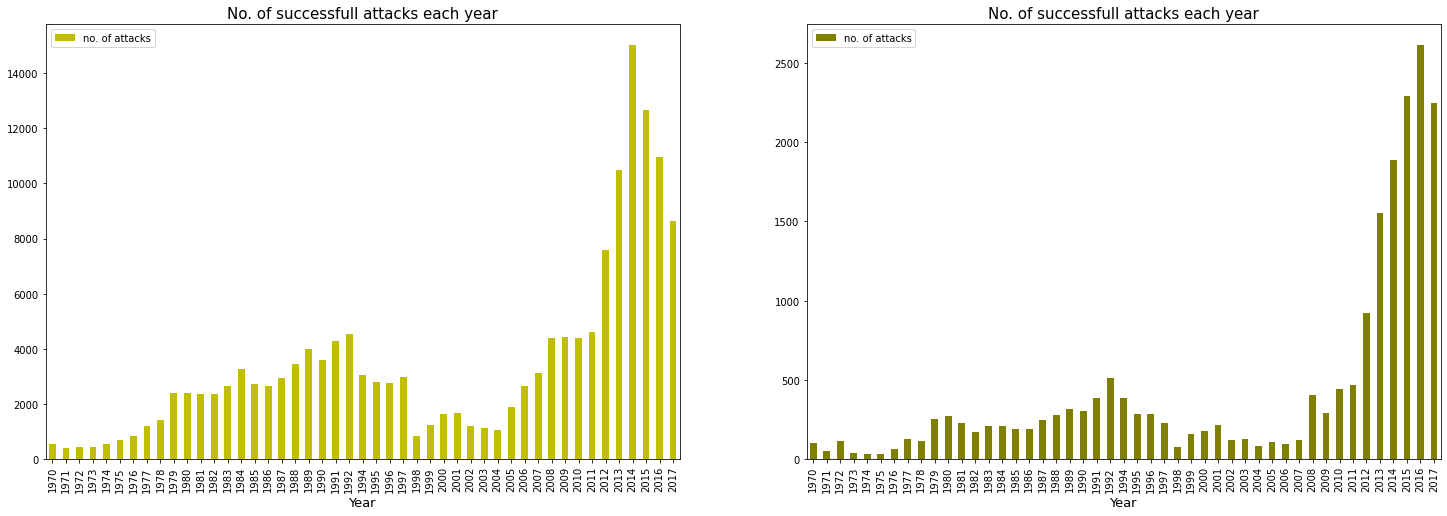

In [28]:
#------------------------------------Block-25-------------------------------------

plt.rcParams['figure.figsize']=(25,8)
fig,axs=plt.subplots(1,2)   #defining figure and intialising axes
success_inattacks_over_years.plot.bar(x='Year',y='no. of attacks',ax=axs[0],color='y')   #bar plot representing no. of successfull attacks every year
failure_inattacks_over_years.plot.bar(x='Year',y='no. of attacks',ax=axs[1],color='olive')   #bar plot representing no. of unsuccessfull attacks every year
axs[0].set_title('No. of successfull attacks each year',fontsize=15)   #to set title
axs[0].set_xlabel('Year',fontsize=13)   #to set x axis label
axs[1].set_title('No. of successfull attacks each year',fontsize=15)
axs[1].set_xlabel('Year',fontsize=13)
plt.show()

*Every year no. of successfull attacks were much more higher than no. of unsuccessfull attacks*

*No. of successfull attacks has been increased over year and was maximum in 2014(around 15000)*

*No. of unsuccessfull also has been increased over years but overall effect is null beacause no. of attacks also has been increased*


###**No. of incidents, deaths and injuries over years (1970-2017)**

---



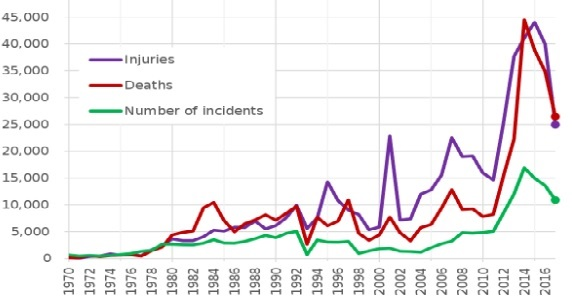

In [29]:
#------------------------------------Block-26-------------------------------------


#importing image from drive
Image(r"/content/drive/MyDrive/Datascience/Datasets/Terrorist incidents worldwide.jpg")

*2014 is noticed to be a year when no. of incidents were at its peak, so as no. of deaths and injuries*

###**Trend of attacks over years in different regions**

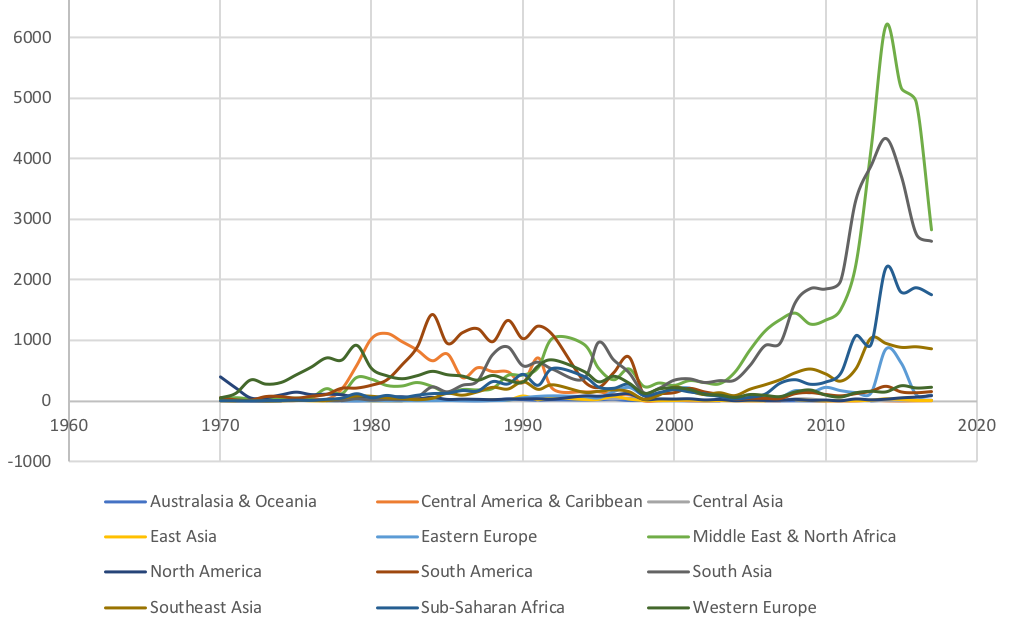

In [30]:
#------------------------------------Block-27-------------------------------------

Image('/content/drive/MyDrive/Datascience/Datasets/Trend of attack across different regions.png')

##**Region and Country wise attack analysis**

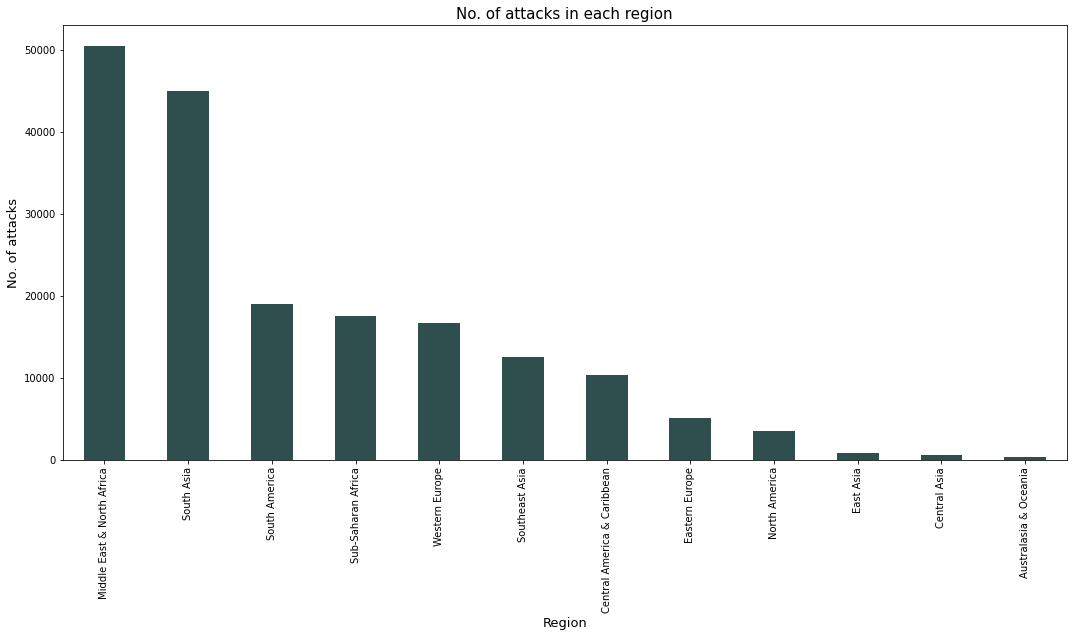

In [31]:
#------------------------------------Block-28-------------------------------------

#visualising no. of attacks region wise over years
plt.rcParams['figure.figsize']=(18,8)
updated_global_terrorism_df['Region'].value_counts().plot.bar(color='darkslategray')   #bar plot showing no. of attacks in each region
plt.title('No. of attacks in each region',fontsize=15)
plt.xlabel('Region',fontsize=13)
plt.ylabel('No. of attacks',fontsize=13)
plt.show()

*Middle East & North Africa and South Asia are most affected regions by terrorist attacks while East Asia, Central Asia and Australasia & Oceania are least affected*

###**Let's check for country having most no. of attacks in most affected regions**

In [32]:
#------------------------------------Block-29-------------------------------------

#creating a subdataframe from updated_global_terrorism_df where region is Middle East & North Africa
most_targeted_regions_data=updated_global_terrorism_df[updated_global_terrorism_df['Region']=='Middle East & North Africa']                                                                                    
#selecting top 10 targeted countries from the region 
MEandNF_country_data=most_targeted_regions_data.groupby(['Region','Country']).agg({'eventid':
                                           'count'}).sort_values(by='eventid',ascending=False).reset_index()[0:10]
MEandNF_country_data.rename(columns={'eventid':'no. of attacks'},inplace =True)   #renaming the column
MEandNF_country_data

,Region,Country,no. of attacks
0,Middle East & North Africa,Iraq,24636
1,Middle East & North Africa,Turkey,4292
2,Middle East & North Africa,Yemen,3347
3,Middle East & North Africa,Algeria,2743
4,Middle East & North Africa,Egypt,2479
5,Middle East & North Africa,Lebanon,2478
6,Middle East & North Africa,Libya,2249
7,Middle East & North Africa,West Bank and Gaza Strip,2227
8,Middle East & North Africa,Syria,2201
9,Middle East & North Africa,Israel,2183


In [33]:
#------------------------------------Block-30-------------------------------------

#creating a subdataframe from updated_global_terrorism_df where region is South Asia
most_targeted_regions_data=updated_global_terrorism_df[updated_global_terrorism_df['Region']=='South Asia']
#selecting top 10 targeted countries from the region
SAsia_country_data=most_targeted_regions_data.groupby(['Region','Country']).agg({'eventid':
                                    'count'}).sort_values(by='eventid',ascending=False).reset_index()[0:10]
SAsia_country_data.rename(columns={'eventid':'no. of attacks'},inplace =True)
SAsia_country_data

,Region,Country,no. of attacks
0,South Asia,Pakistan,14368
1,South Asia,Afghanistan,12731
2,South Asia,India,11960
3,South Asia,Sri Lanka,3022
4,South Asia,Bangladesh,1648
5,South Asia,Nepal,1215
6,South Asia,Maldives,22
7,South Asia,Bhutan,6
8,South Asia,Mauritius,2


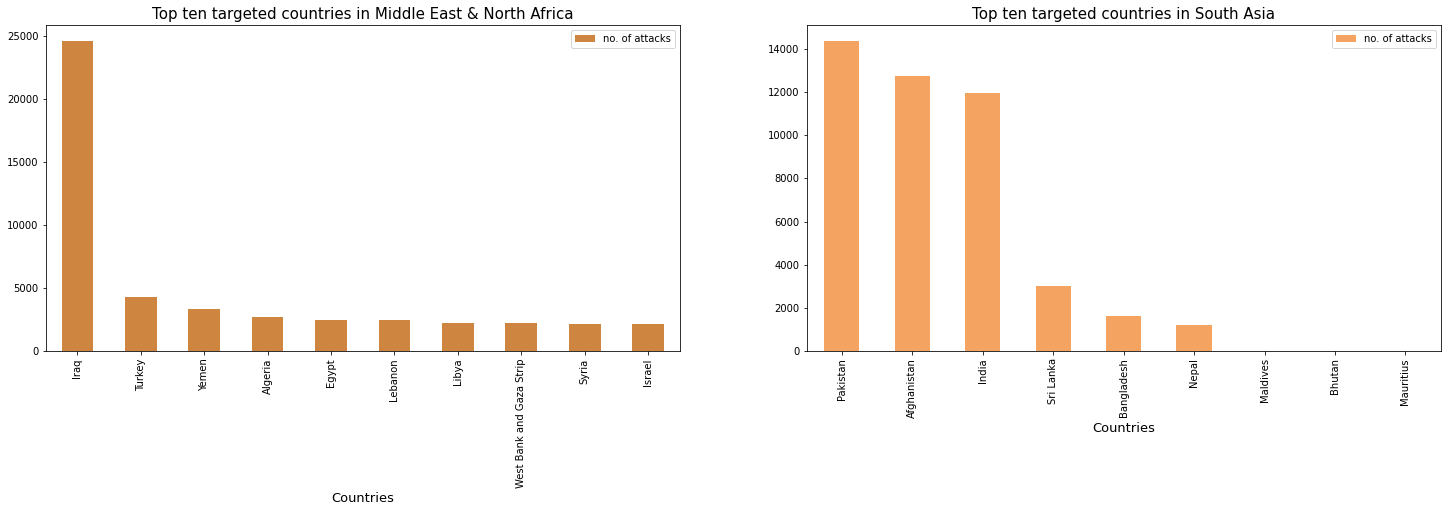

In [34]:
#------------------------------------Block-31-------------------------------------

#visualising Block-30 and Block-31
plt.rcParams['figure.figsize']=(25,6)
fig,axs=plt.subplots(1,2)   #defining figure and initialising axes
MEandNF_country_data.plot.bar(x='Country',y='no. of attacks',ax=axs[0],color='peru')   #bar plot for Block 29
axs[0].set_title('Top ten targeted countries in Middle East & North Africa',fontsize=15)   
axs[0].set_xlabel('Countries',fontsize=13)
SAsia_country_data.plot.bar(x='Country',y='no. of attacks',ax=axs[1],color='sandybrown')   #bar block for Block 30
axs[1].set_title('Top ten targeted countries in South Asia',fontsize=15)  
axs[1].set_xlabel('Countries',fontsize=13)
plt.show()

*From Blocks 29, 30 and 31, we can observe :*

*In Middle East & North Africa, Iraq has most no. of terrorist attacks, infact it tops the list of countries with highest no. of terrorist attacks with a considerable margin from the rest* 

*In South Asia, Pakistan is very first in terms of maximum no. of attacks*

*There are total 8 countries in South Asia, and among these 8, Pakistan, Afghanistan and India are in top 3 in terms of no. of attacks, infact 80% of attacks in South Asia are in these 3 countries.*

*Sri Lanka, Bangladesh and Nepal has comparatively very low no. of attacks and Maldives, Bhutan and Mauritius has almost negligible proportion of attacks*



###**Let's check for most targeted countries in other regions as well**

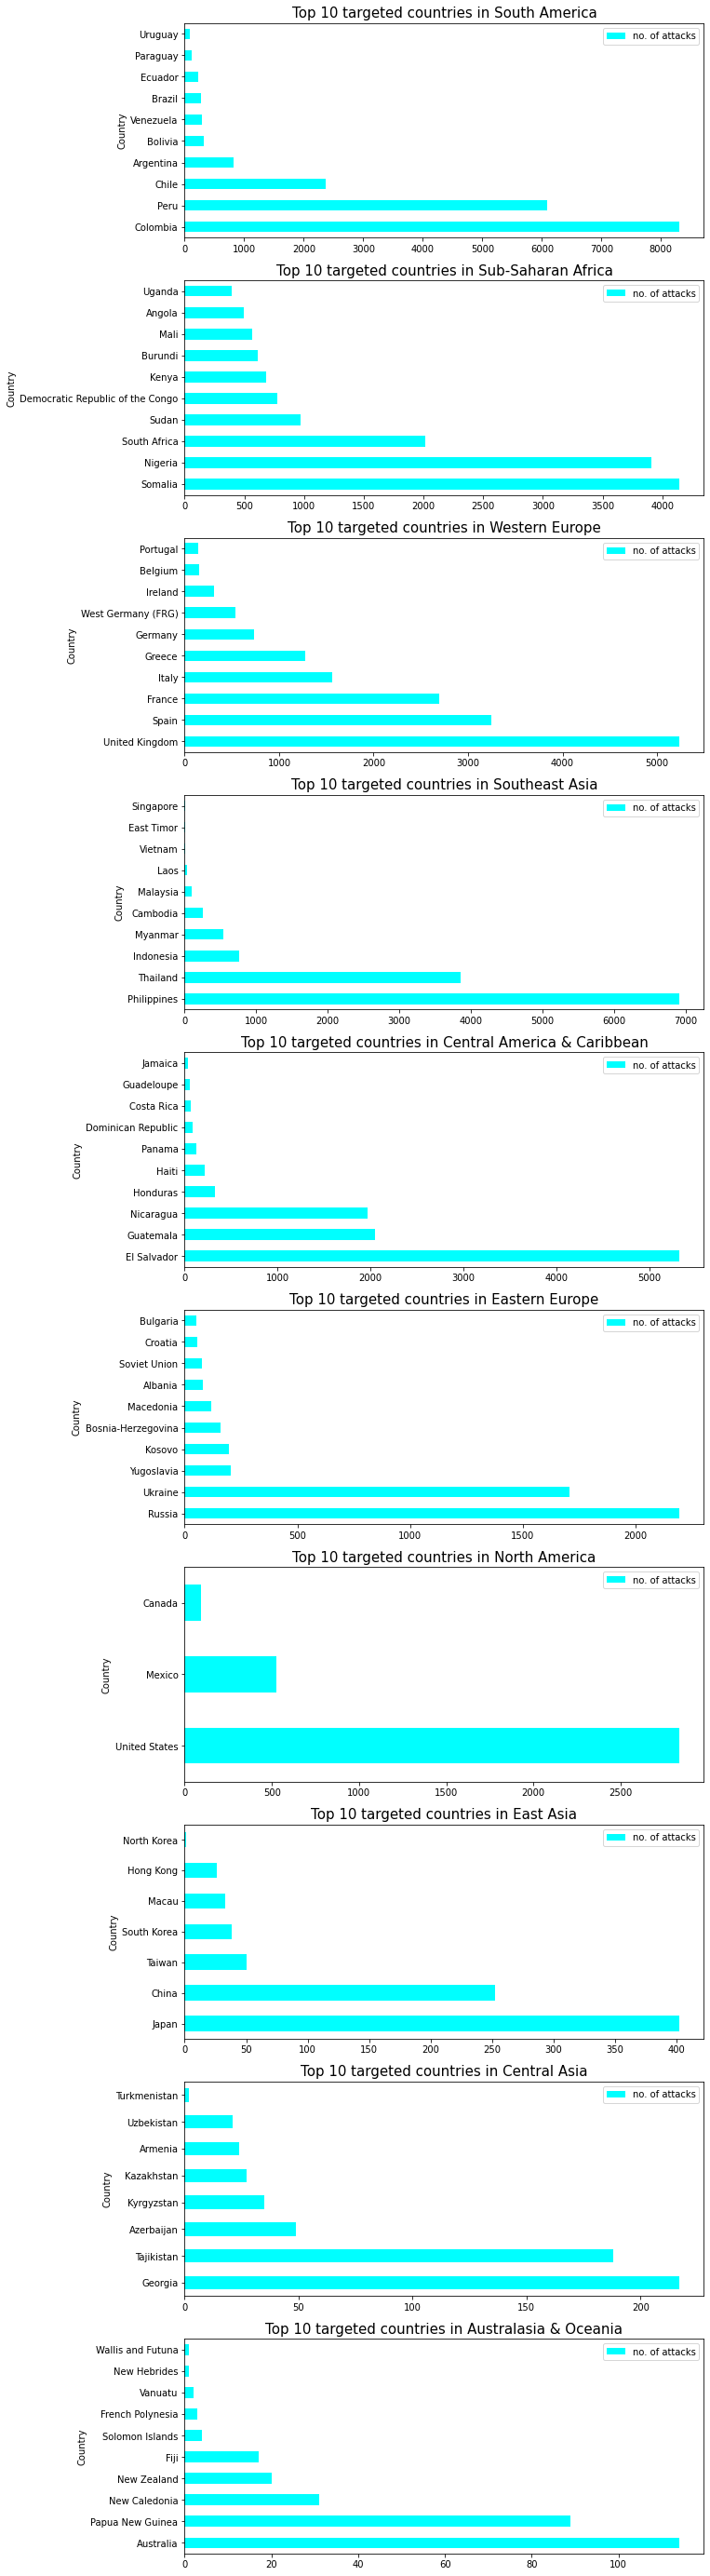

In [35]:
#------------------------------------Block-32-------------------------------------

#top 10 targeted countries in remaining regions
fig,axs = plt.subplots(10,1, figsize=(10,50))  #initialising figure canvas
#storing remaining regions in a list
other_continents=['South America','Sub-Saharan Africa','Western Europe','Southeast Asia', 'Central America & Caribbean',  'Eastern Europe', 
                  'North America','East Asia','Central Asia','Australasia & Oceania']
for i in range(10):
  #to get observations of respective regions
  remaining_targeted_regions_data1=updated_global_terrorism_df[updated_global_terrorism_df['Region']== other_continents[i]]                                                                               
  #to get top 10 targeted countries of respective regions                                                                               
  country_data=remaining_targeted_regions_data1.groupby(['Region','Country']).agg({'eventid':
                                                              'count'}).sort_values(by='eventid',ascending=False).reset_index()[0:10]
  country_data.rename(columns={'eventid':'no. of attacks'},inplace =True)  #renaming column name
  #bar plot for top 10 targeted countries of respective regions
  other_continents_graph=country_data.plot.barh(x='Country',y='no. of attacks',ax=axs[i],color='cyan')   #horizontal bar plot
  #to set title
  other_continents_graph.set_title('Top 10 targeted countries in '+ other_continents[i],fontsize=15)

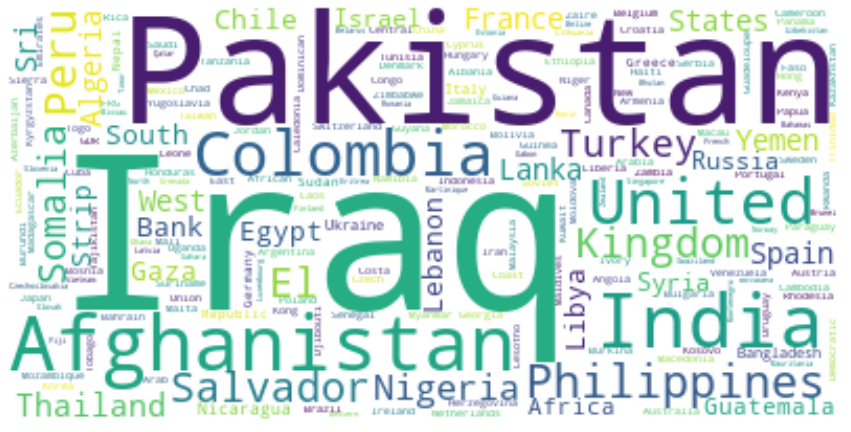

In [36]:
#------------------------------------Block-33-------------------------------------

#visualising most targeted countries
plt.rcParams['figure.figsize']=(15,8)
from wordcloud import WordCloud   #inporting WordCloud
text = " ".join(cat for cat in updated_global_terrorism_df.Country)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')   # Display the generated Word Cloud
plt.axis("off")
plt.show()

*Clearly, it is seen terrorists targets Iraq, US and Pakistan nationals most, followed by India*

*Colombia, Somalia, United Kingdom, Philippines, EI Salvador, Peru, Nigeria, Spain, Thailand and Russia follows top 4 countries in terms of maximum no. of attacks*

###**Successfull attacks across countries**

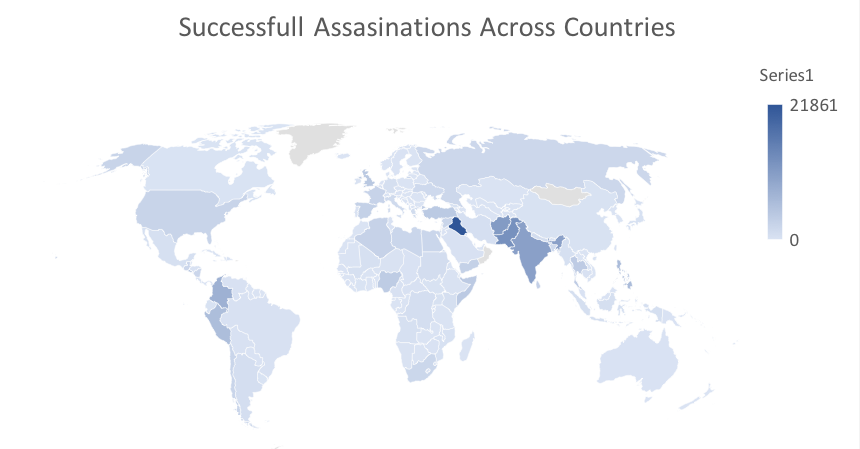

In [37]:
#------------------------------------Block-34-------------------------------------

Image(r"/content/drive/MyDrive/Datascience/Datasets/Successfull attacks across countries.png")

*Clearly, it is seen that most of the successfull attacks are in Iraq and then Pakistan, Afghanistan, India follows after it*

*It is already comprehensible as well because these countries have maximum no. of attacks*

###**Let's check for trend of attack in top 4 countries over years**

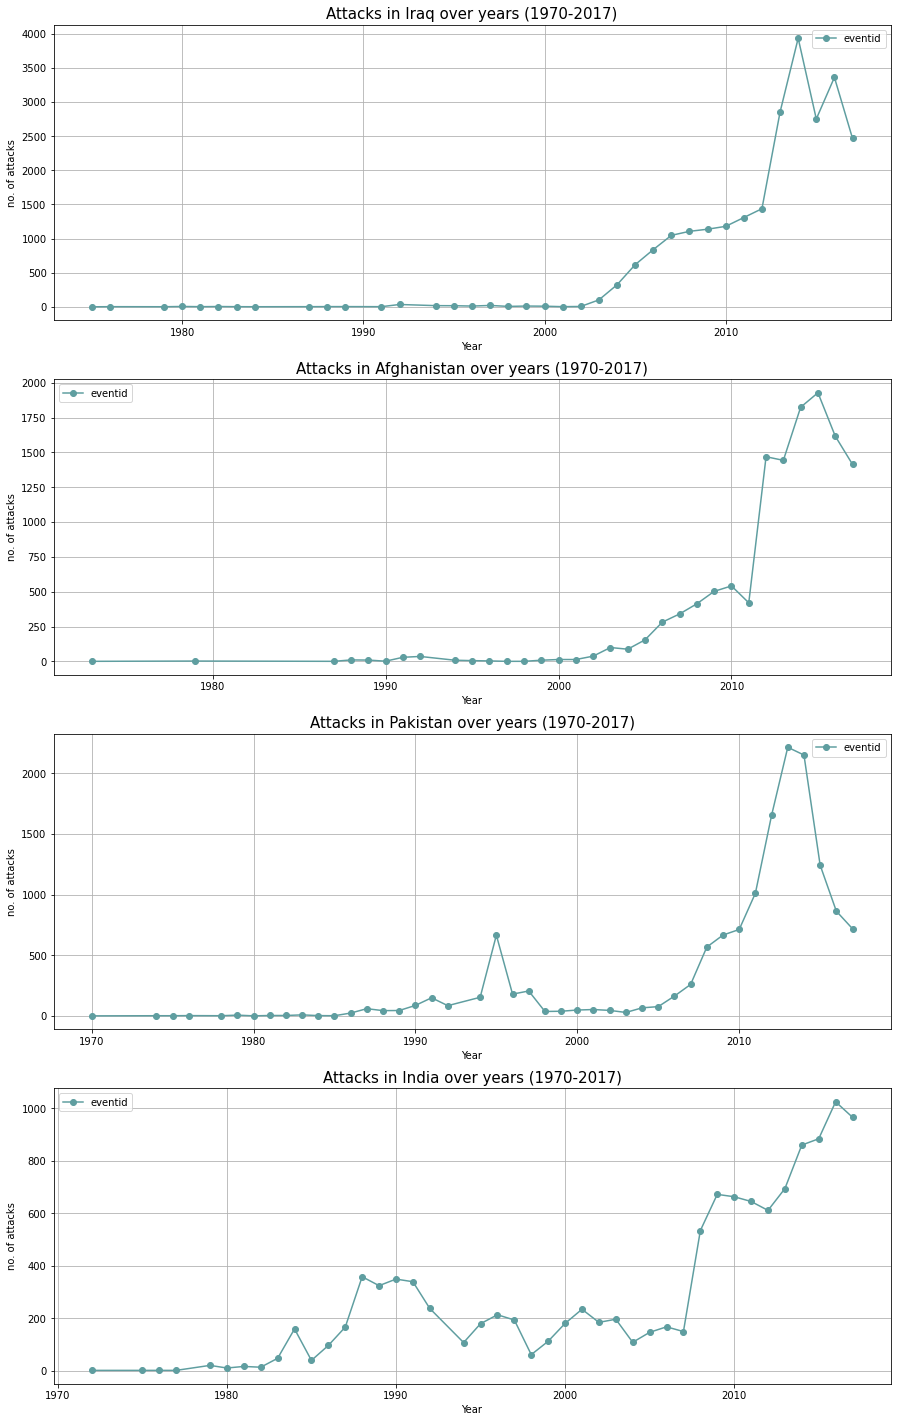

In [38]:
#------------------------------------Block-35-------------------------------------

fig,axs = plt.subplots(4,1, figsize=(15,25))  #initialising figure canvas
country_list=['Iraq','Afghanistan','Pakistan','India']  #storing most targeted countries in a list
#line plot showing trend of attacks over years for countries in country_list
for i in range(4):
  attacks_graph = updated_global_terrorism_df.groupby(updated_global_terrorism_df[updated_global_terrorism_df['Country']==
                        country_list[i]]['Year']).agg({'eventid':'count'}).plot(marker = 'o', ax =axs[i],color='cadetblue')                                                                                 
  attacks_graph.set_ylabel('no. of attacks')
  attacks_graph.set_title('Attacks in '+ country_list[i]+ ' over years (1970-2017)',fontsize=15)   #to set title
  attacks_graph.grid()  # to show grid lines for ease of comprehending graphs

*We can observe that :*

*In Iraq and Afghanistan number of attacks were negligible till 2003, but post that year they started increasing at a very steady rate year by year. Then during the period between 2011 to 2014, there was a drastic increament in the no. of attacks and 2014 is noticed to be the year when no. of attacks were its peak*

*No. of attacks has increased in Pakistan and India as well after 2011*

*Drastic increament in no. of attacks after 2011 in most of the regions but it seems like after 2014-2015 there is gradual decreament in the same*

##**State and city wise attack analysis**

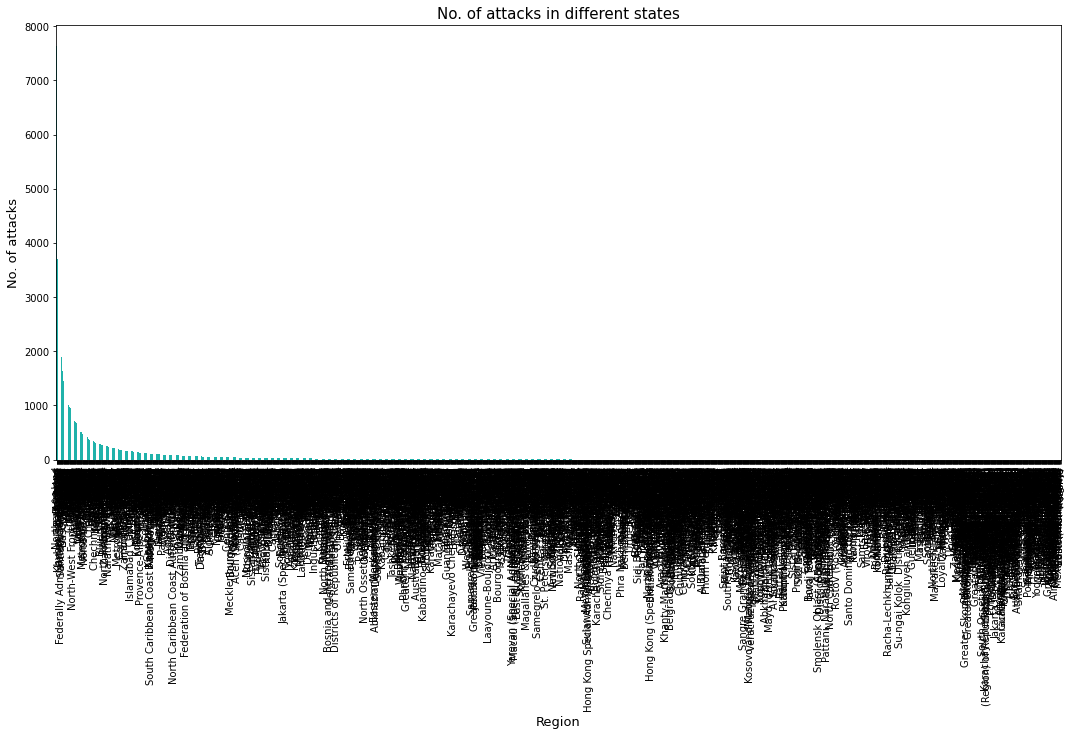

In [39]:
#------------------------------------Block-36-------------------------------------


#visualising no. of attacks state wise  
plt.rcParams['figure.figsize']=(18,8)
updated_global_terrorism_df['State'].value_counts().plot.bar(color='lightseagreen')  #bar plot representing attacks in different states  
plt.title('No. of attacks in different states',fontsize=15)
plt.xlabel('Region',fontsize=13)
plt.ylabel('No. of attacks',fontsize=13)
plt.show()

*Data has large no. of states, we can not visualise all the states at the same time, so let's take top 70 targeted states*

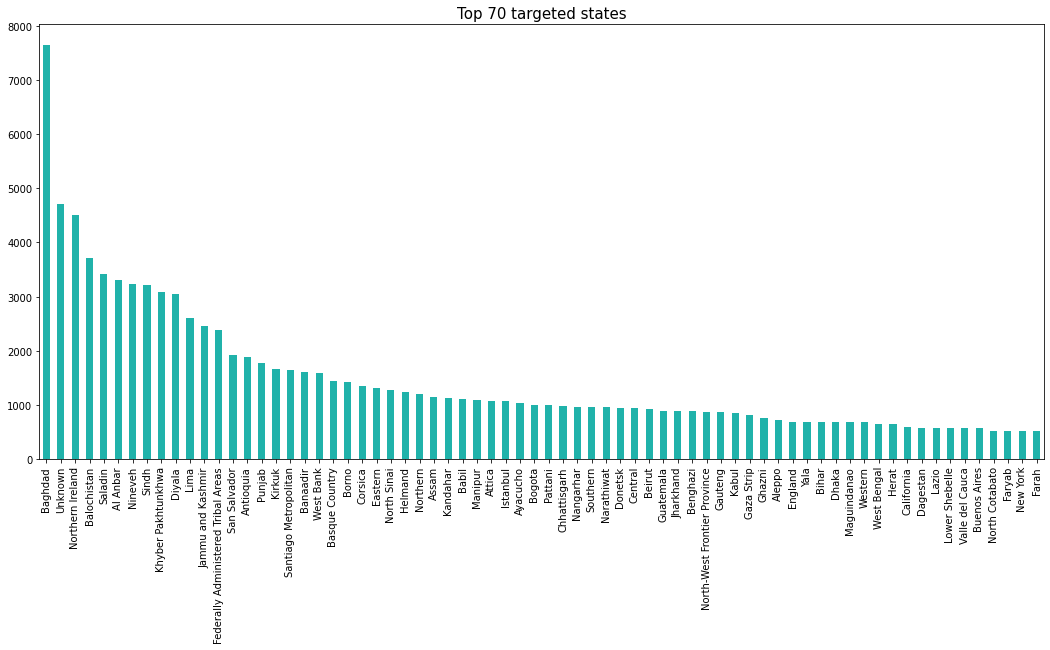

In [40]:
#------------------------------------Block-37-------------------------------------

#visualising top 70 states in terms of maximum no. of terrorist attacks
updated_global_terrorism_df['State'].value_counts()[0:70].plot.bar(color='lightseagreen')
plt.title('Top 70 targeted states',fontsize=15)
plt.show() 

We don't know to which country these states belongs, so let's try to visualise some top states in terms of terrorist attacks and to which country they belong




In [41]:
#------------------------------------Block-38-------------------------------------

#grouping by country and state and calculating no. of attacks for each state of each country
state_wiseattacks_data=updated_global_terrorism_df.groupby(['Country','State']).agg({'eventid':
                                                                                 'count'}).sort_values(by='eventid',ascending=False).reset_index()
state_wiseattacks_data.rename(columns={'eventid':'no. of attacks'},inplace=True)
state_wiseattacks_data[0:12]   #to get top 12 targeted states 

,Country,State,no. of attacks
0,Iraq,Baghdad,7644
1,United Kingdom,Northern Ireland,4498
2,Pakistan,Balochistan,3710
3,Iraq,Saladin,3411
4,Iraq,Al Anbar,3299
5,Iraq,Nineveh,3241
6,Pakistan,Sindh,3206
7,Pakistan,Khyber Pakhtunkhwa,3084
8,Iraq,Diyala,3041
9,Peru,Lima,2615


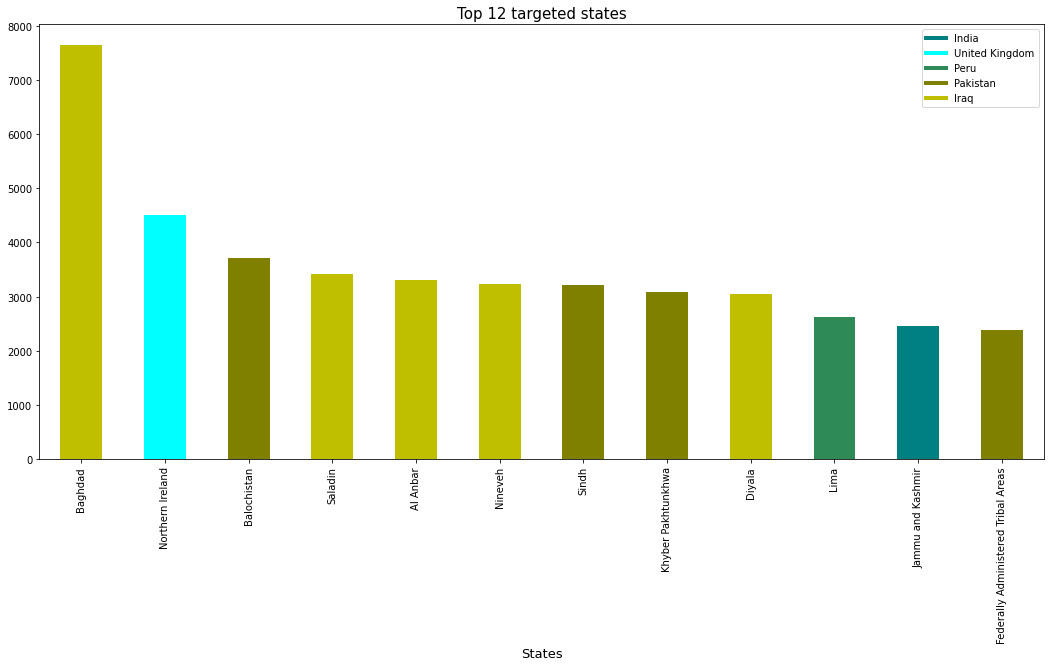

In [42]:
#------------------------------------Block-39-------------------------------------

#visualising Block-38
country_list=list(set(state_wiseattacks_data[0:12]['Country']))   #storing unique countries among top 12 countries in a list
color_=['teal','cyan','seagreen','olive','y']
color_list=[]   #initialising an empty list
country_color_dict={}   #initialising an empty dictionary
for col in country_list:
  country_color_dict[col]=color_[country_list.index(col)]   #assigning unique colour that represents each country
labels=country_color_dict.keys()
for cntry in state_wiseattacks_data[0:12]['Country']:
  color_list.append(country_color_dict[cntry])   #storing the colour of each bar of bar plot in color_list
state_wiseattacks_data[0:12].plot.bar(x='State',y='no. of attacks',color=color_list)    #bar plot
from matplotlib.lines import Line2D    #importing Line2D
custom_lines = [Line2D([0], [0], color='teal', lw=4),    #creating custom labels for a graph
                Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='seagreen', lw=4),
                Line2D([0], [0], color='olive', lw=4),
                Line2D([0], [0], color='y', lw=4)]
plt.legend(custom_lines,labels)   #to get legend in the graph
plt.title('Top 12 targeted states',fontsize=15)
plt.xlabel('States',fontsize=13)
plt.show()              

*From above graph, we can observe :*

*Iraq and Pakistan has most no. of states among top 12 states in terms of maximum no. of attacks*

*Baghdad state of Iraq tops the list of top 12 states with highest no. of terrorist attacks with a considerable margin from the rest*

*North Ireland (state of United Kingdom) follows Iraq in terms of maximum no. of attack*

*Jammu and Kashmir of India is among top 12 states in terms of no. of terrorist attacks*

###**City with maximum no. of attacks**

In [43]:
#------------------------------------Block-40-------------------------------------

#top 20 targeted cities and to which country and state they belong
city_wiseattacks_data=updated_global_terrorism_df.groupby(['Country','State','city']).agg({'eventid':
                                                                       'count'}).sort_values(by='eventid',ascending=False).reset_index()[0:20]
city_wiseattacks_data.rename(columns={'eventid':'no. of attacks'},inplace=True)
city_wiseattacks_data

,Country,State,city,no. of attacks
0,Iraq,Baghdad,Baghdad,7585
1,Pakistan,Sindh,Karachi,2650
2,Peru,Lima,Lima,2359
3,Iraq,Nineveh,Mosul,2264
4,United Kingdom,Northern Ireland,Belfast,2170
5,Chile,Santiago Metropolitan,Santiago,1611
6,Somalia,Banaadir,Mogadishu,1581
7,El Salvador,San Salvador,San Salvador,1557
8,Turkey,Istanbul,Istanbul,1048
9,Greece,Attica,Athens,1018


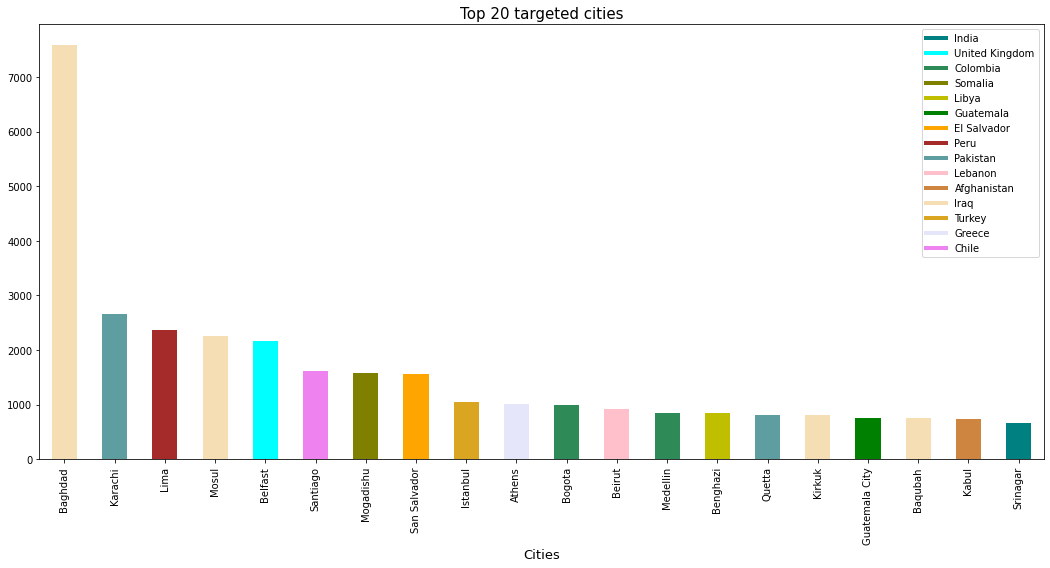

In [44]:
#------------------------------------Block-41-------------------------------------

#visualising Block-40
country_list=list(set(city_wiseattacks_data['Country']))   #storing unique countries 
color_=['teal','cyan','seagreen','olive','y','g','orange','brown','cadetblue','pink','peru','wheat','goldenrod','lavender','violet']
color_list=[]   #initialising an empty list
country_color_dict={}   #initialising an empty dictionary
for col in country_list:
  country_color_dict[col]=color_[country_list.index(col)]   #assigning unique colour that represents each country
labels=country_color_dict.keys()
for cntry in city_wiseattacks_data['Country']:
  color_list.append(country_color_dict[cntry])   #storing the colour of each bar of bar plot in color_list
city_wiseattacks_data.plot.bar(x='city',y='no. of attacks',color=color_list)    #bar plot
#creating custom labels for a graph
custom_lines = [Line2D([0], [0], color='teal', lw=4),  Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='seagreen', lw=4),Line2D([0], [0], color='olive', lw=4),  
                Line2D([0], [0], color='y', lw=4), Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='orange', lw=4), Line2D([0], [0], color='brown', lw=4), 
                Line2D([0], [0], color='cadetblue', lw=4),Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='peru', lw=4), Line2D([0], [0], color='wheat', lw=4),
                Line2D([0], [0], color='goldenrod', lw=4), Line2D([0], [0], color='lavender', lw=4), 
                Line2D([0], [0], color='violet', lw=4)]
plt.legend(custom_lines,labels)   #to get legend in the graph
plt.title('Top 20 targeted cities',fontsize=15)
plt.xlabel('Cities',fontsize=13)
plt.show()           


*From Block 40 and 41, we can observe that:*

*Baghdad city of Iraq tops cities with highest no. of attacks with a considerable margin*

*Karachi,Kabul,Srinagar cities of Pakistan, Afghanistan and India respectively has maximum no. of attacks in comparison to other cities of these countries*

*Although in above blocks we observed, Pakistan, Afghanistan and India are in top 3 after Iraq in terms of no. of terrorist attacks but in top 20 targeted cities, combinely,only 7 cities are from these 3 countries and also other cities have more no. of attacks in comparison to some of these 7 cities*

###**No. of people killed and injured during attacks in different regions**



In [45]:
#------------------------------------Block-42-------------------------------------

#people killed and injured region wise
regionwise_killinjured_data=updated_global_terrorism_df.groupby('Region').agg({'eventid':'count',
                                                         'Killed':'sum','Wounded':'sum'}).sort_values(by='eventid',ascending=False)
regionwise_killinjured_data.rename(columns={'eventid':'no. of attacks'},inplace=True)  #renaming column
regionwise_killinjured_data

,no. of attacks,Killed,Wounded
Region,,,
Middle East & North Africa,50474,137642.0,214308.0
South Asia,44974,101319.0,141360.0
South America,18978,28849.0,16704.0
Sub-Saharan Africa,17550,78386.0,52857.0
Western Europe,16639,6694.0,18332.0
Southeast Asia,12485,15637.0,26259.0
Central America & Caribbean,10344,28708.0,8991.0
Eastern Europe,5144,7415.0,12045.0
North America,3456,4916.0,21531.0


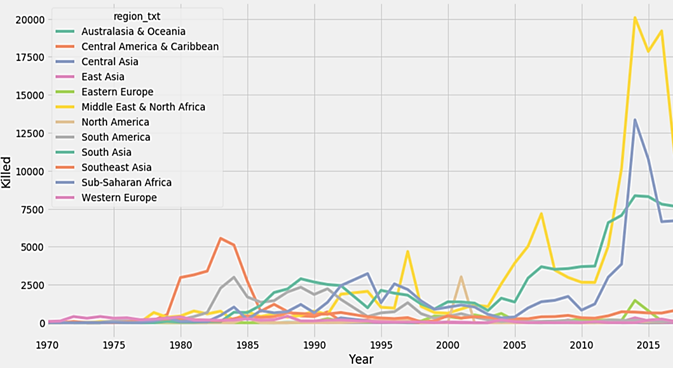

In [55]:
#------------------------------------Block-43-------------------------------------

#visualising Block-42
#no. of people killed in different regions over years
Image(r"/content/drive/MyDrive/Datascience/Datasets/No. of people killed in different regions.png")

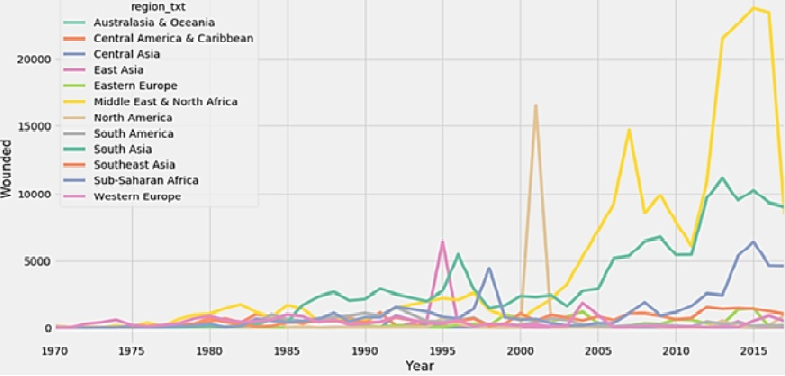

In [56]:
#------------------------------------Block-44-------------------------------------

#visualising Block-42
#no. of people injured in different regions over years
Image(r"/content/drive/MyDrive/Datascience/Datasets/No. of people injured in attacks.png")

*Most no. of people are killed in Middle east & North Africa and South Asia regions, this is understood as well, these two regions have most no. of attacks*

*People injured is more than people killed in these two regions*


##**Attack_type, Target, Weapon_type, Duration of attack, no. of suicidal attacks analysis**

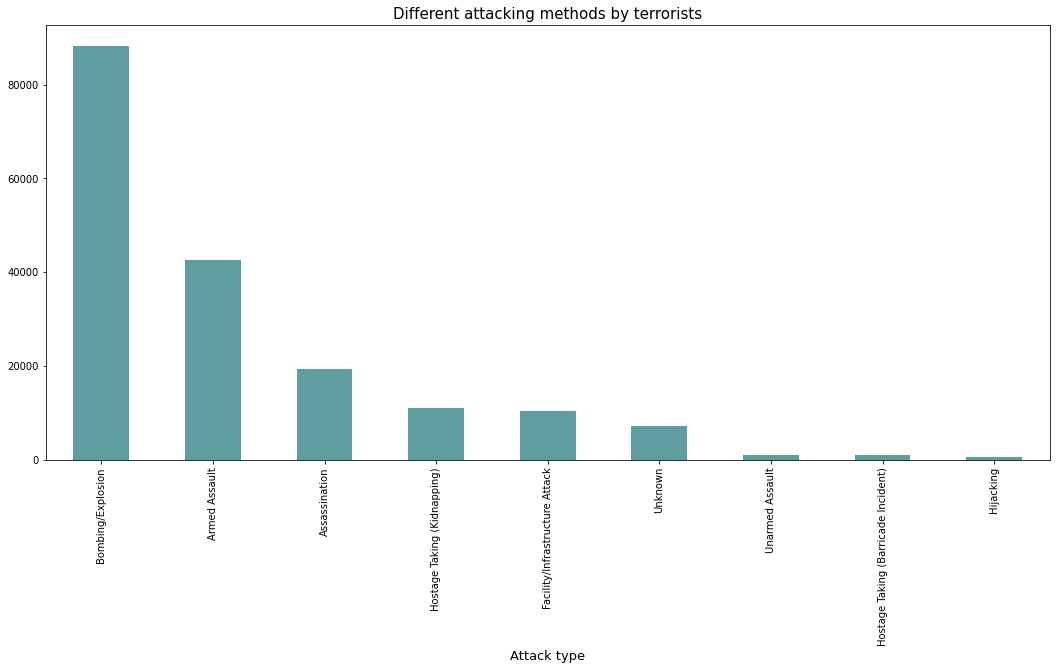

In [48]:
#------------------------------------Block-45a-------------------------------------

#visualising different attack methods used by terrorists
updated_global_terrorism_df['Attack_Type'].value_counts().plot.bar(color='cadetblue')   #bar plot
plt.title('Different attacking methods by terrorists',fontsize=15)
plt.xlabel('Attack type',fontsize=13)
plt.show()

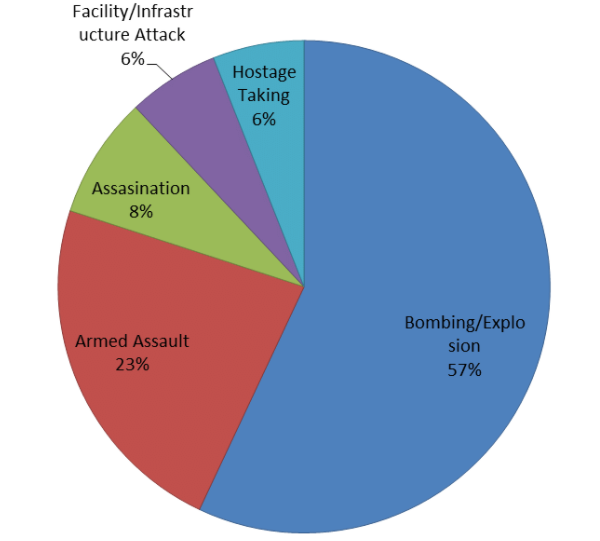

In [49]:
#------------------------------------Block-45b-------------------------------------

#top 5 tactics used by terrorist groups
Image(r"/content/drive/MyDrive/Datascience/Datasets/Different tactics used by terrorists.png")

*Among top 5 preferred attacking methods, Bombing/Explosion is most common way to attack and Hostage taking is used least. This might be because of strong security in airports*

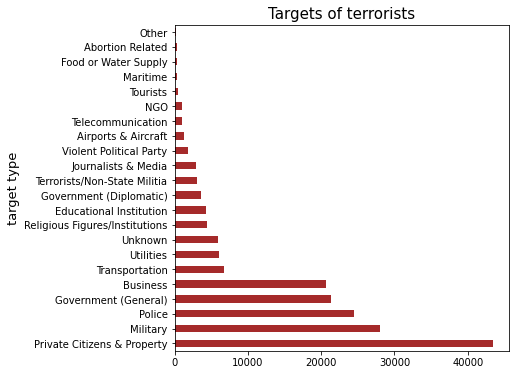

In [50]:
#------------------------------------Block-46-------------------------------------

#visualising different targets of terrorists
plt.rcParams['figure.figsize']=(6,6)
updated_global_terrorism_df['Target_type'].value_counts().plot.barh(color='brown')   #bar plot
plt.title('Targets of terrorists',fontsize=15)
plt.ylabel('target type',fontsize=13)
plt.show()

*Mostly, terrorist groups target private citizens and property then military, police and government(general)*

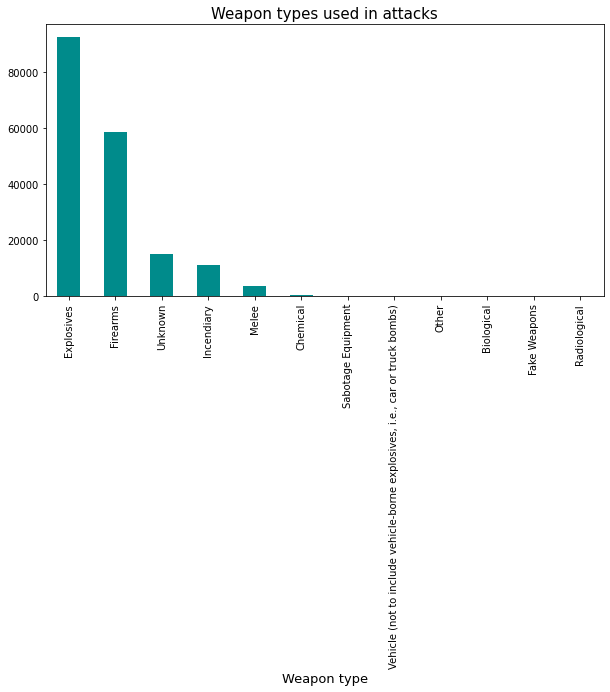

In [51]:
#------------------------------------Block-47-------------------------------------

#visualising different weapon types used by terrorists
plt.rcParams['figure.figsize']=(10,5)
updated_global_terrorism_df['Weapon_type'].value_counts().plot.bar(color='darkcyan')   #bar plot showing count of different weapons used by terrorists
plt.title('Weapon types used in attacks',fontsize=15)   #to set title
plt.xlabel('Weapon type',fontsize=13)
plt.show()

*Mostly explosives are used in attacks followed by firearms*

*Chemicals are used very rare*

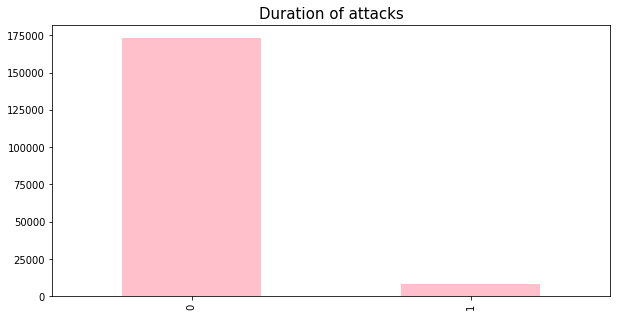

In [52]:
#------------------------------------Block-48-------------------------------------

#visualising duration of attacks
updated_global_terrorism_df['extended'].value_counts().plot.bar(color='pink')   #plot showing no. of attacks having 24 hr duration
plt.title('Duration of attacks',fontsize=15)
plt.show()

*Duration of attacks is less than 24 hours usually*

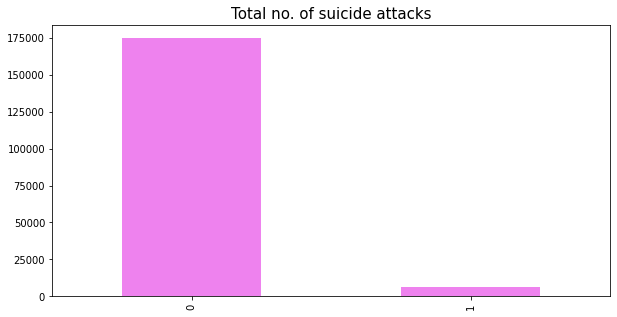

In [53]:
#------------------------------------Block-49-------------------------------------

#visualising no. of suicidal attacks
updated_global_terrorism_df['suicide'].value_counts().plot.bar(color='violet')   #plot showing no. of suicidal attacks
plt.title('Total no. of suicide attacks',fontsize=15)
plt.show()

*Mostly attacks were non suicidal*

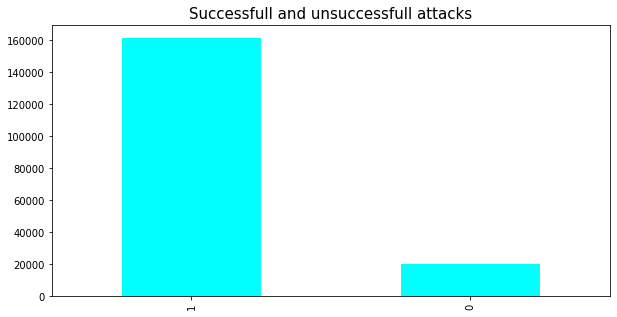

In [54]:
#------------------------------------Block-50-------------------------------------

#looking for successfull attacks
updated_global_terrorism_df['success'].value_counts().plot.bar(color='cyan')   #plot showing no. of successful and unsuccessful attacks
plt.title('Successfull and unsuccessfull attacks',fontsize=15)
plt.show()

*Most of the attacks were successfull*

*Among top 5 preferred attacking methods, Bombing/Explosion is most common way to attack and Hostage taking is used least. This might be because of strong security in airports*

*Mostly, terrorist groups target private citizens and property then military, police and government(general)*

*Mostly explosives are used in attacks followed by firearms*

*Chemicals are used very rare*